<a href="https://colab.research.google.com/github/scarfboy/wetsuite/blob/main/examples/Kamervragen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install https://github.com/scarfboy/wetsuite/archive/refs/heads/main.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 27 kB 8.1 MB/s
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 4.7 MB 57.5 MB/s 
     |████████████████████████████████| 1.1 MB 49.8 MB/s 
     |████████████████████████████████| 6.6 MB 47.9 MB/s 
     |████████████████████████████████| 120 kB 61.3 MB/s 
  Created wheel for wstest: filename=wstest-0.0.10-py3-none-any.whl size=18752 sha256=c450bb761ea57decf0ca2e479cd7554bc0f83aa36ea5b91c1607eac3f09308ef
  Stored in directory: /tmp/pip-ephem-wheel-cache-azk7zp0x/wheels/cb/f6/86/8653da50b4a3623b3403cff092a14291b07d96c8cf2d480187
Successfully built wstest


In [3]:
import wetsuite.datasets
kv = wetsuite.datasets.load('kamervragen')
print(kv.description)
len(kv.data)

Downloaded     71MiB  [==================================================]
Decompressing



    Questions from members of the parliament (at the moment only tweede kamer) to the government.

    Source: The KOOP SRU repositories,  specifically the ah-tk documents (aanhangsels, tweede kamer) within the officielepublicaties set.
    Restricted to documents that contain answers (ignoring documents that are only the questions, or only a note that they will be answered later)

    The structure of .data looks something like:
       {'ah-tk-20102011-2857': {
            'identifier': 'ah-tk-20102011-2857',
            'urls':   [ 'https://repository.overheid.nl/frbr/officielepublicaties/ah-tk/20102011/ah-tk-20102011-2857/1/metadata/metadata.xml',
                        'https://repository.overheid.nl/frbr/officielepublicaties/ah-tk/20102011/ah-tk-20102011-2857/1/xml/ah-tk-20102011-2857.xml',
                        ... 
                      ],
            'issued':       '2011-06-17',
            'available':    '2011-06-23',
            'vergaderjaar': '2010-2011',
            

34832

# What do questions look like?

In [22]:
import textwrap, random

for kv_id, kv_details in random.sample( kv.data.items(), 2): # pick two random documents
    vraagdata = kv_details['vraagdata']

    for number in vraagdata:
          vraag    = vraagdata[number].get('vraag')   # note that these will be [plaintext, xmlfragment], the [0] below picks up just the first
          antwoord = vraagdata[number].get('antwoord')
          if vraag and antwoord: # one way to ignore lone vraag/antwoord due to varied numbering; the get will fetch one to be None
              print( 'Q%-3s %s'%(number, '\n'.join(textwrap.wrap(vraag[0], subsequent_indent='     '))) )
              print( 'A%-3s %s'%(number, '\n'.join(textwrap.wrap(antwoord[0], subsequent_indent='     '))) )
              print()


Q1   Herinnert u zich dat u op 8 februari 2017 het volgende aan de Kamer
     schreef:  «Naar aanleiding van de signalen over mogelijke
     onregelmatigheden bij de aanbesteding van de ondersteuning van
     het programma Broedkamer, heb ik een extern forensisch onderzoek
     in gang gezet naar deze aanbestedingsprocedure. Bij het uitzetten
     van de opdracht wordt er op gelet dat de uitvoerende partij
     onafhankelijk is ten opzichte van alle deelnemers aan de
     aanbesteding en niet eerder op enigerlei wijze betrokken is
     geweest.  In het onderzoek zal onder meer aandacht worden besteed
     aan de rechtmatigheid en ordelijkheid van de
     aanbestedingsprocedure zelf, aan mogelijke voorkennis over de
     opdracht bij de leverancier waaraan de opdracht is gegund en
     mogelijke banden tussen medewerkers van de Belastingdienst en van
     de gekozen leverancier. Het onderzoek wordt verricht in opdracht
     van de directeur-generaal Belastingdienst en ondersteund door e

In [23]:
# What does the metadata look like?

In [24]:
import pandas
df = pandas.DataFrame.from_dict( kv.data, orient='index' )
df['available_parsed'] = pandas.to_datetime(df['available'])
df['year'] = df['available_parsed'].dt.year
df

,urls,indiener,ontvanger,vergaderjaar,available,issued,type,category,identifier,vraagdata,available_parsed,year
ah-tk-20212022-3272,[https://repository.overheid.nl/frbr/officiele...,"[D.G. Boswijk, L. Bromet]",[H. Staghouwer],2021-2022,2022-06-28,2022-06-27,"[officiële publicatie, Antwoord, Aanhangsel va...",Landbouw | Planten,ah-tk-20212022-3272,{'1': {'vraag': ['Bent u bekend met het artike...,2022-06-28,2022
ah-tk-20212022-2046,[https://repository.overheid.nl/frbr/officiele...,[S.M. Beckerman],[H.M. de Jonge],2021-2022,2022-03-17,2022-03-14,"[officiële publicatie, Antwoord, Aanhangsel va...",Huisvesting | Organisatie en beleid,ah-tk-20212022-2046,{'1': {'vraag': ['Kent u het bericht inzake de...,2022-03-17,2022
ah-tk-20202021-2878,[https://repository.overheid.nl/frbr/officiele...,[F.W. Futselaar],[C.J. Schouten],2020-2021,2021-05-28,2021-05-21,"[officiële publicatie, Antwoord, Aanhangsel va...",Natuur en milieu | Stoffen,ah-tk-20202021-2878,{'1': {'vraag': ['Bent u bekend met de bericht...,2021-05-28,2021
ah-tk-20192020-121,[https://repository.overheid.nl/frbr/officiele...,[G.J. (Gijs) van Dijk],[T. van Ark],2019-2020,2019-10-01,2019-09-30,"[officiële publicatie, Antwoord, Aanhangsel va...",Financiën | Inkomensbeleid,ah-tk-20192020-121,{'1': {'vraag': ['Heeft u kennisgenomen van he...,2019-10-01,2019
ah-tk-20182019-1855,[https://repository.overheid.nl/frbr/officiele...,[H. Nijboer],[W.B. Hoekstra],2018-2019,2019-03-15,2019-03-14,"[officiële publicatie, Antwoord, Aanhangsel va...",Financiën | Financieel toezicht,ah-tk-20182019-1855,{'1': {'vraag': ['Herinnert u zich nog uw antw...,2019-03-15,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
ah-tk-20212022-177,[https://repository.overheid.nl/frbr/officiele...,[S. Kerseboom],"[H.P.M. Knapen, Th.J.A.M. de Bruijn]",2021-2022,2021-10-07,2021-10-06,"[officiële publicatie, Antwoord, Aanhangsel va...",Internationaal | Internationale samenwerking,ah-tk-20212022-177,{'1': {'vraag': ['Wat betekenen de sterke aanw...,2021-10-07,2021
ah-tk-20212022-3507,[https://repository.overheid.nl/frbr/officiele...,[P. van Houwelingen],[D. Yesilgöz-Zegerius],2021-2022,2022-07-13,2022-07-12,"[officiële publicatie, Antwoord, Aanhangsel va...",Internationaal | Internationale samenwerking,ah-tk-20212022-3507,{'1': {'vraag': ['Bent u bekend met het rappor...,2022-07-13,2022
ah-tk-20212022-3508,[https://repository.overheid.nl/frbr/officiele...,"[H. Bontenbal, S.P.A. Erkens]",[R.A.A. Jetten],2021-2022,2022-07-13,2022-07-12,"[officiële publicatie, Antwoord, Aanhangsel va...",Natuur en milieu | Energie,ah-tk-20212022-3508,{'1': {'vraag': ['Klopt het dat de huidige reg...,2022-07-13,2022
ah-tk-20212022-3496,[https://repository.overheid.nl/frbr/officiele...,[W.R. van Haga],[E. van der Burg],2021-2022,2022-07-13,2022-07-11,"[officiële publicatie, Antwoord, Aanhangsel va...",Migratie en integratie | Immigratie,ah-tk-20212022-3496,{'1': {'vraag': ['Bent u bekend met het berich...,2022-07-13,2022


In [25]:
df['category'].value_counts()

Zorg en gezondheid | Organisatie en beleid             2586
Openbare orde en veiligheid | Criminaliteit            1409
Internationaal | Organisatie en beleid                 1393
Openbare orde en veiligheid | Organisatie en beleid    1217
Recht | Staatsrecht                                     818
                                                       ... 
Migratie en integratie | Emigratie                       16
Recht | Bestuursrecht                                    15
Sociale zekerheid | Nabestaanden                         12
Economie | Toerisme                                      11
Werk | Levensloop                                         8
Name: category, Length: 111, dtype: int64

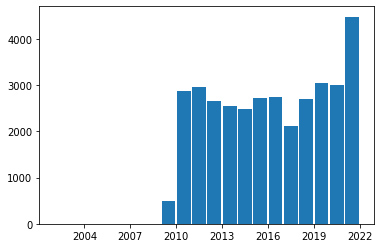

In [27]:
import matplotlib.pyplot, matplotlib.ticker
fig, axis = matplotlib.pyplot.subplots()
axis.hist(df['year'], align='mid', rwidth=0.9, bins=max(df['year'])-min(df['year']) )
axis.xaxis.set_major_locator( matplotlib.ticker.MaxNLocator(integer=True) )



# How many of these grouped answers / mismatched number cases are there?

```
'vraagdata':    {
                '1': {
                      'vraag':    ['Bent u bekend met de tv-uitzending, waarin o.a. de moeder van Lucas haar verhaal doet?', '<vraag> Bent ...']
                   'antwoord':    ['Ja.',  '<antwoord> Ja. ...']
                },

```



In [4]:
mismatched, matched = 0,0

for id, details in list(kv.data.items())[:200]:  # [:200]:
    vraagdata = details['vraagdata']

    vraag_numbers = set()
    antwoord_numbers = set()

    for number in vraagdata:
        if 'vraag' in vraagdata[number]:
            vraag_numbers.add( number )
        if 'antwoord' in vraagdata[number]:
            antwoord_numbers.add( number )

        diff = vraag_numbers.symmetric_difference( antwoord_numbers )
        if len(diff) > 0:
            mismatched += 1
            if 0:  # showing all cases in the dataset would be very spammy
                print('\n=== %s ==='%id)
                print("Vragen:     %s"%sorted(vraag_numbers))
                print("Antwoorden: %s"%sorted(antwoord_numbers))
                print("Difference: %s"%sorted(diff))
                print( details['urls'][-1] )
        else:
            matched += 1

mismatched, matched

(50, 1503)